# CAE 526 Project 1
## Fall 2022
### Al Mitchell


In [251]:
#libraries used

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy import stats
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors


In [252]:
df = pd.read_csv('C:/Users/amitc/Documents/GitHub/IIT-PhD/CAE526/P1/CAE526-P1_HH UtilityData_Mitchell.csv')
df.head()

,MONTH,STEAM [kBTU],ELEC [kWh],ELEC [kBTU],CHW [Ton-hr],CHW [kBTU],DHW [gal],AVG TEMP [F]
0,Jun-11,94080.0,81793.0,279159.5,7300.0,87600.0,998200.0,70.7
1,Jul-11,33360.0,90032.0,307279.2,10808.3,129700.0,1113700.0,79.9
2,Aug-11,17090.0,87106.0,297292.8,1550.0,18600.0,832700.0,74.3
3,Sep-11,165250.0,87828.0,299757.0,683.3,8200.0,702100.0,63.3
4,Oct-11,740440.0,89589.0,305767.3,441.7,5300.0,264200.0,55.6


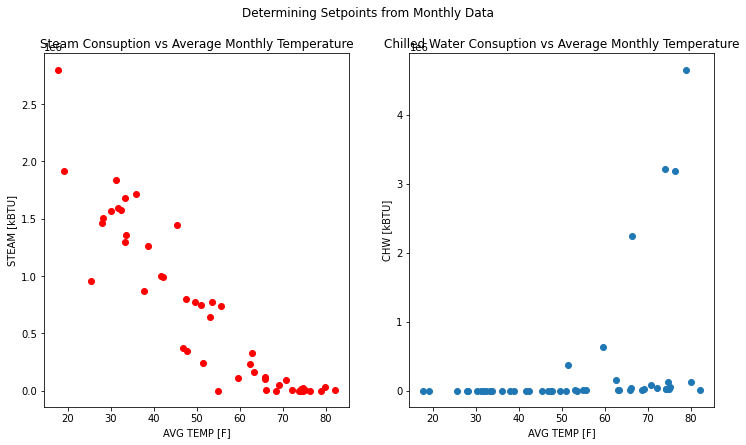

In [253]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6.5))
fig.suptitle('Determining Setpoints from Monthly Data')

steam = df['STEAM [kBTU]']
chw = df['CHW [kBTU]']
elec = df['ELEC [kBTU]']
month = df['MONTH']
temp = df['AVG TEMP [F]']

ax1.scatter(temp, steam, label='Steam', color='red')
ax1.set_xlabel('AVG TEMP [F]')
ax1.set_ylabel('STEAM [kBTU]')
ax1.set_title('Steam Consuption vs Average Monthly Temperature')


# dfFit = df.loc[df['AVG TEMP [F]'] < 60]
# steamf = dfFit['STEAM [kBTU]'] 
# # chw = df['CHW [kBTU]']
# # elec = df['ELEC [kBTU]']
# # month = df['MONTH']
# tempfs = dfFit['AVG TEMP [F]']

# slope, intercept, r, p, std_err = stats.linregress(steamf, tempfs)

# def myfunc(x):
#   return slope * x + intercept

# mymodel = list(map(myfunc, steamf))

# ax1.plot(steamf, mymodel)

ax2.scatter(temp,chw, label='CHW')
ax2.set_xlabel('AVG TEMP [F]')
ax2.set_ylabel('CHW [kBTU]')
ax2.set_title('Chilled Water Consuption vs Average Monthly Temperature')

plt.show()


#Part C

In [254]:
gsf = 111135

df2012 = df.iloc[7:19]
df2013 = df.iloc[19:31]
df2020 = df.iloc[37:49]
eui2012 = (df2012.sum(axis=0)[1] + df2012.sum(axis=0)[3] + df2012.sum(axis=0)[5])/gsf
eui2013 = (df2013.sum(axis=0)[1] + df2013.sum(axis=0)[3] + df2013.sum(axis=0)[5])/gsf
eui2020 = (df2020.sum(axis=0)[1] + df2020.sum(axis=0)[3] + df2020.sum(axis=0)[5])/gsf

print('EUI 2012 = ' + str(eui2012))
print('EUI 2013 = ' + str(eui2013))
print('EUI 2020 = ' + str(eui2020))


EUI 2012 = 102.36085121698834
EUI 2013 = 96.182563548837
EUI 2020 = 206.50929419174878


In [255]:
dc = pd.read_csv('Building_Energy_Benchmarking.csv')
chi = pd.read_csv('Chicago_Energy_Benchmarking.csv')

initChi = chi.shape[0]
chi = chi.dropna(subset=['Site EUI (kBtu/sq ft)', 'Source EUI (kBtu/sq ft)', 'Year Built', 'Gross Floor Area - Buildings (sq ft)'])
chi = chi[(chi['Site EUI (kBtu/sq ft)'] < 2000)]
chi = chi[(chi['Source EUI (kBtu/sq ft)'] < 2000)]
finChi = chi.shape[0]

print('Chicagos dataset had ' + str(initChi) + ', but ' + str(initChi - finChi) + ' were eliminated due to lacking data.  The final total is ' + str(finChi))

initDC = dc.shape[0]
dc = dc.dropna(subset=['SITEEUI_KBTU_FT', 'SOURCEEUI_KBTU_FT', 'YEARBUILT', 'TAXRECORDFLOORAREA'])
dc = dc[(dc['SITEEUI_KBTU_FT'] < 2000)]
dc = dc[(dc['SOURCEEUI_KBTU_FT'] < 2000)]
finDC = dc.shape[0]

print('DCs dataset had ' + str(initDC) + ', but ' + str(initDC - finDC) + ' were eliminated due to lacking data.  The final total is ' + str(finDC))

Chicagos dataset had 17728, but 3638 were eliminated due to lacking data.  The final total is 14090
DCs dataset had 23015, but 5779 were eliminated due to lacking data.  The final total is 17236


C:\Users\amitc\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [256]:
chi[['Site EUI (kBtu/sq ft)', 'Source EUI (kBtu/sq ft)','Year Built', 'Gross Floor Area - Buildings (sq ft)']].describe()

,Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Year Built,Gross Floor Area - Buildings (sq ft)
count,14090.000000,14090.000000,14090.000000,1.409000e+04
mean,94.793797,174.137970,1963.356849,2.706812e+05
std,74.823566,125.003038,37.017238,4.399147e+05
min,0.100000,0.200000,1692.000000,2.725600e+04
25%,62.000000,110.700000,1928.000000,7.730000e+04
50%,80.500000,142.900000,1969.000000,1.317820e+05
75%,103.200000,192.675000,1998.000000,2.878435e+05
max,1692.700000,1898.400000,2020.000000,9.245333e+06


In [257]:
chiUniversity = chi[chi['Primary Property Type'] == 'College/University']
chiUniversity[['Site EUI (kBtu/sq ft)', 'Source EUI (kBtu/sq ft)','Year Built', 'Gross Floor Area - Buildings (sq ft)']].describe()

,Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Year Built,Gross Floor Area - Buildings (sq ft)
count,519.000000,519.000000,519.000000,5.190000e+02
mean,126.208863,223.005780,1968.040462,2.419413e+05
std,171.617117,186.080224,34.421029,3.132669e+05
min,0.100000,0.300000,1889.000000,5.017400e+04
25%,68.000000,143.700000,1939.000000,8.570500e+04
50%,92.500000,187.800000,1973.000000,1.420633e+05
75%,128.800000,241.850000,1998.000000,2.923105e+05
max,1648.500000,1742.800000,2019.000000,2.944091e+06


In [258]:
dc[['SITEEUI_KBTU_FT', 'SOURCEEUI_KBTU_FT', 'YEARBUILT', 'TAXRECORDFLOORAREA']].describe()

,SITEEUI_KBTU_FT,SOURCEEUI_KBTU_FT,YEARBUILT,TAXRECORDFLOORAREA
count,17236.000000,17236.000000,17236.000000,1.723600e+04
mean,65.440392,149.807798,1966.768624,2.042429e+05
std,50.858862,108.744975,33.576652,2.929062e+05
min,0.000000,0.000000,1727.000000,0.000000e+00
25%,41.900000,95.600000,1948.000000,6.469200e+04
50%,60.400000,137.600000,1968.000000,1.210000e+05
75%,80.400000,189.000000,1991.000000,2.564840e+05
max,1293.400000,1866.500000,2019.000000,3.997572e+06


In [259]:
dcUniversity = dc[dc['PRIMARYPROPERTYTYPE_EPACALC'] == 'College/University']
dcUniversity[['SITEEUI_KBTU_FT', 'SOURCEEUI_KBTU_FT', 'YEARBUILT', 'TAXRECORDFLOORAREA']].describe()

,SITEEUI_KBTU_FT,SOURCEEUI_KBTU_FT,YEARBUILT,TAXRECORDFLOORAREA
count,384.000000,384.000000,384.000000,3.840000e+02
mean,58.755469,118.930208,1957.052083,4.240765e+05
std,109.478270,179.299391,46.613318,5.745147e+05
min,0.000000,0.000000,1789.000000,0.000000e+00
25%,0.000000,0.000000,1928.500000,1.179300e+05
50%,29.200000,39.950000,1966.000000,1.665750e+05
75%,83.600000,192.850000,1992.750000,4.676540e+05
max,1148.200000,1467.800000,2015.000000,3.526986e+06


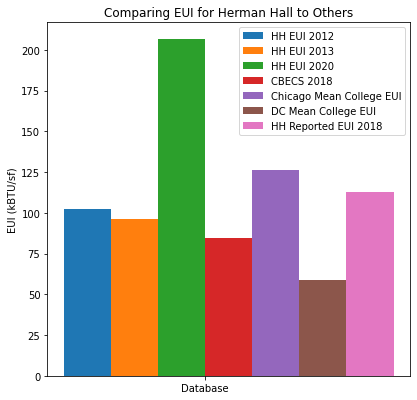

In [260]:
N = 1
ind = np.arange(N) 
width = 0.25

fig, ax = plt.subplots(figsize=(6.5,6.5))

hh2012 = [102.36]
bar1 = plt.bar(ind, hh2012, width)
  
hh2013 = [96.18]
bar2 = plt.bar(ind+width, hh2013, width)
  
h2020 = [206.51]
bar3 = plt.bar(ind+width*2, h2020, width)

cbecs = [84.3]
bar4 = plt.bar(ind+width*3, cbecs, width)

chiUnivesityMean = [126.2]
bar5 = plt.bar(ind+width*4, chiUnivesityMean, width)

dcUniversityMean = [58.75]
bar6 = plt.bar(ind+width*5, dcUniversityMean, width)

hh2018 = [113.1]
bar7 = plt.bar(ind+width*6, hh2018, width)

plt.ylabel('EUI (kBTU/sf)')
plt.title("Comparing EUI for Herman Hall to Others")
plt.xticks(ind+width*2.5,['Database'])
plt.legend( (bar1, bar2, bar3, bar4, bar5, bar6, bar7), ('HH EUI 2012', 'HH EUI 2013', 'HH EUI 2020', 'CBECS 2018', 'Chicago Mean College EUI', 'DC Mean College EUI', 'HH Reported EUI 2018') )
plt.show()

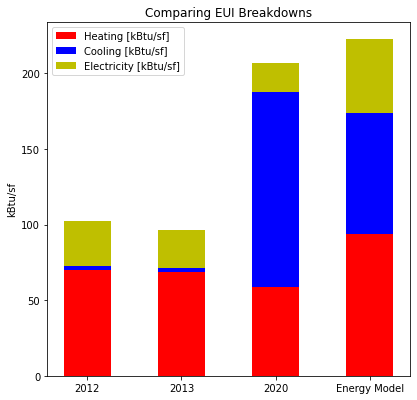

In [261]:
#Part H
gsf = 111135
gsfm = 70580

labels = ['2012', '2013', '2020', 'Energy Model']
Heating = np.array([(df2012.sum(axis=0)[1]/gsf), (df2013.sum(axis=0)[1]/gsf), (df2020.sum(axis=0)[1]/gsf), (6629014/gsfm)])
Cooling = np.array([(df2012.sum(axis=0)[5]/gsf), (df2013.sum(axis=0)[5]/gsf), (df2020.sum(axis=0)[5]/gsf), (5624394/gsfm)])
Elec = np.array([(df2012.sum(axis=0)[3]/gsf), (df2013.sum(axis=0)[3]/gsf), (df2020.sum(axis=0)[3]/gsf), (3450832/gsfm)])
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(6.5,6.5))

ax.bar(labels, Heating, width, label='Heating [kBtu/sf]', color='r')
ax.bar(labels, Cooling, width,  bottom=Heating, label='Cooling [kBtu/sf]', color='b')
ax.bar(labels, Elec, width, bottom=Heating+Cooling, label='Electricity [kBtu/sf]', color='y')


ax.set_ylabel('kBtu/sf')
ax.set_title('Comparing EUI Breakdowns')
ax.legend()

plt.show()

In [262]:
elecM = pd.DataFrame([307120.364,276999.0232,308282.4912,293606.1485,311633.7917,310152.9837,273186.318,275666.7737,276699.4838,277059.4498,266751.1836,273530.1111])
chwM = pd.DataFrame([3400,8530,50600,170020,270960,942490,1370470,1404030,996340,311480,93800,2280])
hwM = pd.DataFrame([1564990,1140850,799080,389590,258450,143460,115560,133420,163050.359630,568950,1216980])

#CVRMSE = 100*(1/(np.mean(elecM))*sum()

df2012 = df2012.reset_index()

elecCVRMSE = 0
elecNMBE = 0
yi = 0
yi_hat = 0
for x in elecM:
    yi = elecM[x]
    yi_hat = df2012['ELEC [kBTU]'][x]
    elecCVRMSE = elecCVRMSE+(((yi-yi_hat)**2)/(12-1))
    elecNMBE = elecNMBE+(yi-yi_hat)
Celec = 100*(1/df2012['ELEC [kBTU]'].mean(axis=0))*(sum(elecCVRMSE)**(1/2))
Nelec = 100*(sum(elecNMBE)/((12-1)*(df2012['ELEC [kBTU]'].mean(axis=0))))

print(Celec)
print(Nelec)

heatCVRMSE = 0
heatNMBE = 0
yi = 0
yi_hat = 0
for x in hwM:
    yi = hwM[x]
    yi_hat = df2012['STEAM [kBTU]'][x]
    heatCVRMSE = heatCVRMSE+(((yi-yi_hat)**2)/(12-1))
    heatNMBE = heatNMBE+(yi-yi_hat)
Cheat = 100*(1/df2012['STEAM [kBTU]'].mean(axis=0))*(sum(heatCVRMSE)**(1/2))
Nheat = 100*(sum(heatNMBE)/((12-1)*(df2012['STEAM [kBTU]'].mean(axis=0))))

print(Cheat)
print(Nheat)

chwCVRMSE = 0
chwNMBE = 0
yi = 0
yi_hat = 0
for x in chwM:
    yi = chwM[x]
    yi_hat = df2012['CHW [kBTU]'][x]
    chwCVRMSE = chwCVRMSE+(((yi-yi_hat)**2)/(12-1))
    chwtNMBE = chwNMBE+(yi-yi_hat)
Cchw = 100*(1/df2012['CHW [kBTU]'].mean(axis=0))*(sum(chwCVRMSE)**(1/2))
Nchw = 100*(sum(heatNMBE)/((12-1)*(df2012['CHW [kBTU]'].mean(axis=0))))

print(Cchw)
print(Nchw)




19.913432349353705
-19.768368681056113
206.43986078640916
-192.05087597291453
3489.9488426440666
-5918.852958392633
